# https://github.com/teemkwong/MachineLearning.git

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import os.path
import codecs
import pandas
import jieba
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
import networkx as nx

# pandas.get_option("display.max_rows")
pandas.set_option("display.max_rows", 999)

In [3]:
#=========================
def create_corpus(directory_path):
  filePaths = []
  fileContents=[]
  directory_files = os.listdir(directory_path)
  for file_item in directory_files:
    # filePath=os.path.join(directory_files, file)
    # filePaths.append(file_item)
    file_path = directory_path + file_item
    filePaths.append(file_path)
    with open(file_path, mode='r', encoding='utf-8') as f:
      fileContent = f.read()
      fileContentClean = fileContent.replace("\n", "")
      fileContents.append(fileContentClean)
  corpus = pandas.DataFrame({'filePath': filePaths,'fileContent': fileContents})
  return corpus

#===========================
def word_segmentation(user_dict_paths, corpus):
  segments = []
  filePaths = []

  for dict_path in user_dict_paths:
    jieba.load_userdict(dict_path)

  for index, row in corpus.iterrows():
      filePath = row['filePath']
      fileContent = row['fileContent']
      ### cut the text to phrases
      segs = jieba.cut(fileContent)
      for seg in segs:
          segments.append(seg)
          filePaths.append(filePath)
  # segmentDataFrame = pandas.DataFrame({'segment': segments,'filePath': filePaths})
  segmentDataFrame = pandas.DataFrame({'segment': segments})
  return segmentDataFrame

#===============================
def word_frequency(stop_file, segmentDataFrame):
  ### count the phrases
  segStat = segmentDataFrame.groupby(by="segment")["segment"].agg([("count",np.size)]).reset_index().sort_values(by=["count"],ascending=False)
  ### use stop words
  stopwords = pandas.read_csv(stop_file, encoding='utf8', index_col=False, quoting=csv.QUOTE_NONE)
  ### use ~ to select the opposite
  fSegStat = segStat[~segStat['segment'].isin(stopwords.iloc[:, 0])]
  return fSegStat

# ===============================
def word_cloud(fSegStat):
  font_path = "/content/drive/MyDrive/Colab Notebooks/book_analysis/font/jf-openhuninn-1.1.ttf"
  wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=500)
  ### convert to dict
  words = fSegStat.set_index('segment').to_dict()
  ### use count to create wordcloud
  wordcloud.fit_words(words['count'])
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  plt.close()
  return

In [4]:
directory_path = "/content/drive/MyDrive/Colab Notebooks/book_analysis/book/"
user_dict_paths = ["/content/drive/MyDrive/Colab Notebooks/book_analysis/dict/solo_dict.txt", "/content/drive/MyDrive/Colab Notebooks/book_analysis/dict/char_dict.txt"]
stop_file = "/content/drive/MyDrive/Colab Notebooks/book_analysis/stopwords/stopwords_cht.txt"

corpus = create_corpus(directory_path)

segmentDataFrame = word_segmentation(user_dict_paths, corpus)

fSegStat = word_frequency(stop_file, segmentDataFrame)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.766 seconds.
DEBUG:jieba:Loading model cost 1.766 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [5]:
### characters dict
char_file = "/content/drive/MyDrive/Colab Notebooks/book_analysis/dict/char_dict.txt"

chars = pandas.read_csv(char_file, encoding='utf8', header=None, index_col=False, quoting=csv.QUOTE_NONE)

chars_list = chars.iloc[:, 0].tolist()

In [ ]:
### other phrases dict
solo_file = "/content/drive/MyDrive/Colab Notebooks/book_analysis/dict/solo_dict.txt"

solo = pandas.read_csv(solo_file, encoding='utf8', header=None, index_col=False, quoting=csv.QUOTE_NONE)

solo_list = solo.iloc[:, 0].tolist()

In [6]:
# find_list = ['獨孤九劍','獨孤','九劍','式']
# find_list = ['盈盈']

char_seg = fSegStat[fSegStat['segment'].isin(chars_list)]
char_seg

# solo_seg = fSegStat[fSegStat['segment'].isin(solo_list)]
# solo_seg

# print("Total chars: {0}".format(len(chars_list)))
# print("Total segments: {0}".format(len(char_seg)))
# seg_list = char_seg['segment'].tolist()
# print(chars_list)
# print(seg_list)
# print(list(set(chars_list) - set(seg_list)))
# fSegStat[fSegStat['segment'].str.contains('|'.join(chars_list))]
# fSegStat[fSegStat['segment'].str.contains(r'破.*式|總訣式', regex=True)]
# fSegStat[fSegStat['segment'].str.len() >= 4].head(100)
# fSegStat.head(100)

,segment,count
4692,令狐冲,5213
16822,岳不群,1182
31665,盈盈,1012
25613,林平之,928
16859,岳靈珊,917
6700,儀琳,728
30728,田伯光,699
4994,任我行,520
11323,向問天,515
16955,左冷禪,480


In [ ]:
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)

ax = char_seg.plot.bar(x='segment', y='count', rot=0)
# ax = solo_seg.plot.bar(x='segment', y='count', rot=0)

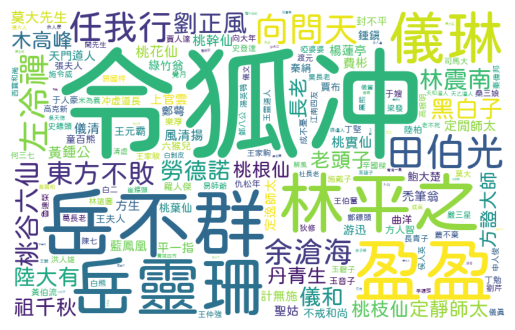

In [8]:
# word_cloud(fSegStat)
word_cloud(char_seg)
# word_cloud(solo_seg)

In [9]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('/content/drive/MyDrive/Colab Notebooks/book_analysis/font/jf-openhuninn-1.1.ttf')
mpl.rc('font', family='jf-openhuninn-1.1')

def create_relationship(text_path, char_file):
  with open(text_path, mode='r', encoding='utf-8') as f:
    fileContent = f.read()
  
  chars = pandas.read_csv(char_file, encoding='utf8', header=None, index_col=False, quoting=csv.QUOTE_NONE)
  chars_list = chars.iloc[:, 0].tolist()

  relations = {}
  para_list = (fileContent).split('\n')
  for text in para_list:
    for name_0 in chars_list:
      if name_0 in text:
        for name_1 in chars_list:
          if name_1 in text and name_0 != name_1 and (name_1, name_0) not in relations:
            relations[(name_0, name_1)] = relations.get((name_0, name_1), 0) + 1

  # maxRela = max([v for k, v in relations.items()])
  # relations = {k:round(v / maxRela, 2) for k,v in relations.items()}
  return relations

def draw_network(relaction_dict):
  plt.figure(figsize = (20, 20))
  G = nx.Graph()
  for k, v in relaction_dict.items():
    G.add_edge(k[0], k[1], weight=v)
      
  # elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > 0.5]
  # emidle = [(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] > 0.2) and (d['weight'] <= 0.5)]
  # esmall = [(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] >= 0.1 and d['weight'] < 0.2)]

  elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= 100]
  emidle = [(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] < 100 and d['weight'] >= 50)]
  esmall = [(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] < 50 and d['weight'] >= 10)]

  pos = nx.spring_layout(G, k=3, seed=1)
  # pos = nx.circular_layout(G)
  nx.draw_networkx_nodes(G, pos, alpha=0.8, node_size=1200)
  # nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5, edge_color='b')
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3, alpha=0.9, edge_color='g')
  nx.draw_networkx_edges(G, pos, edgelist=emidle, width=2, alpha=0.6, edge_color='y')
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.3, edge_color='b', style='dotted')
  nx.draw_networkx_labels(G, pos, font_size=12, font_family='jf-openhuninn-1.1')
  # labels = nx.get_edge_attributes(G, 'weight')
  # nx.draw_networkx_edge_labels(G, pos, font_size=12, edge_labels=labels)
  
  plt.axis('off')
  plt.title("人物關係圖", fontdict={'fontsize':20})
  plt.show()

In [10]:
text_path = "/content/drive/MyDrive/Colab Notebooks/book_analysis/book/XiaoAoJiangHu.txt"
char_file = "/content/drive/MyDrive/Colab Notebooks/book_analysis/dict/char_dict.txt"
char_relation = create_relationship(text_path, char_file)

In [11]:
sorted_relation = sorted(char_relation.items(), key=lambda x:x[1], reverse=True)
for k in sorted_relation:
  print(k)

(('盈盈', '令狐冲'), 480)
(('令狐冲', '岳不群'), 326)
(('令狐冲', '岳靈珊'), 283)
(('令狐冲', '儀琳'), 269)
(('令狐冲', '田伯光'), 243)
(('令狐冲', '向問天'), 182)
(('林平之', '岳靈珊'), 170)
(('令狐冲', '林平之'), 154)
(('令狐冲', '任我行'), 136)
(('令狐冲', '桃谷六仙'), 123)
(('儀琳', '田伯光'), 111)
(('令狐冲', '左冷禪'), 111)
(('莫大', '莫大先生'), 105)
(('東方不敗', '令狐冲'), 97)
(('岳不群', '岳靈珊'), 96)
(('令狐冲', '黑白子'), 92)
(('林平之', '余滄海'), 91)
(('東方不敗', '任我行'), 83)
(('令狐冲', '陸大有'), 77)
(('令狐冲', '儀和'), 77)
(('左冷禪', '岳不群'), 77)
(('令狐冲', '余滄海'), 74)
(('令狐冲', '祖千秋'), 74)
(('令狐冲', '老頭子'), 73)
(('林平之', '木高峰'), 73)
(('令狐冲', '丹青生'), 72)
(('任我行', '向問天'), 71)
(('岳不群', '林平之'), 69)
(('盈盈', '任我行'), 66)
(('令狐冲', '風清揚'), 65)
(('盈盈', '岳不群'), 65)
(('盈盈', '東方不敗'), 63)
(('儀和', '儀清'), 63)
(('令狐冲', '方證大師'), 61)
(('祖千秋', '老頭子'), 59)
(('令狐冲', '黃鍾公'), 57)
(('林平之', '林震南'), 56)
(('令狐冲', '勞德諾'), 55)
(('余滄海', '木高峰'), 54)
(('令狐冲', '方生'), 54)
(('令狐冲', '儀清'), 54)
(('令狐冲', '莫大'), 50)
(('令狐冲', '長老'), 50)
(('桃根仙', '桃幹仙'), 50)
(('令狐冲', '桃根仙'), 48)
(('盈盈', '林平之'), 48)
(('禿筆翁', '丹青生'), 44)
(('左冷禪', 

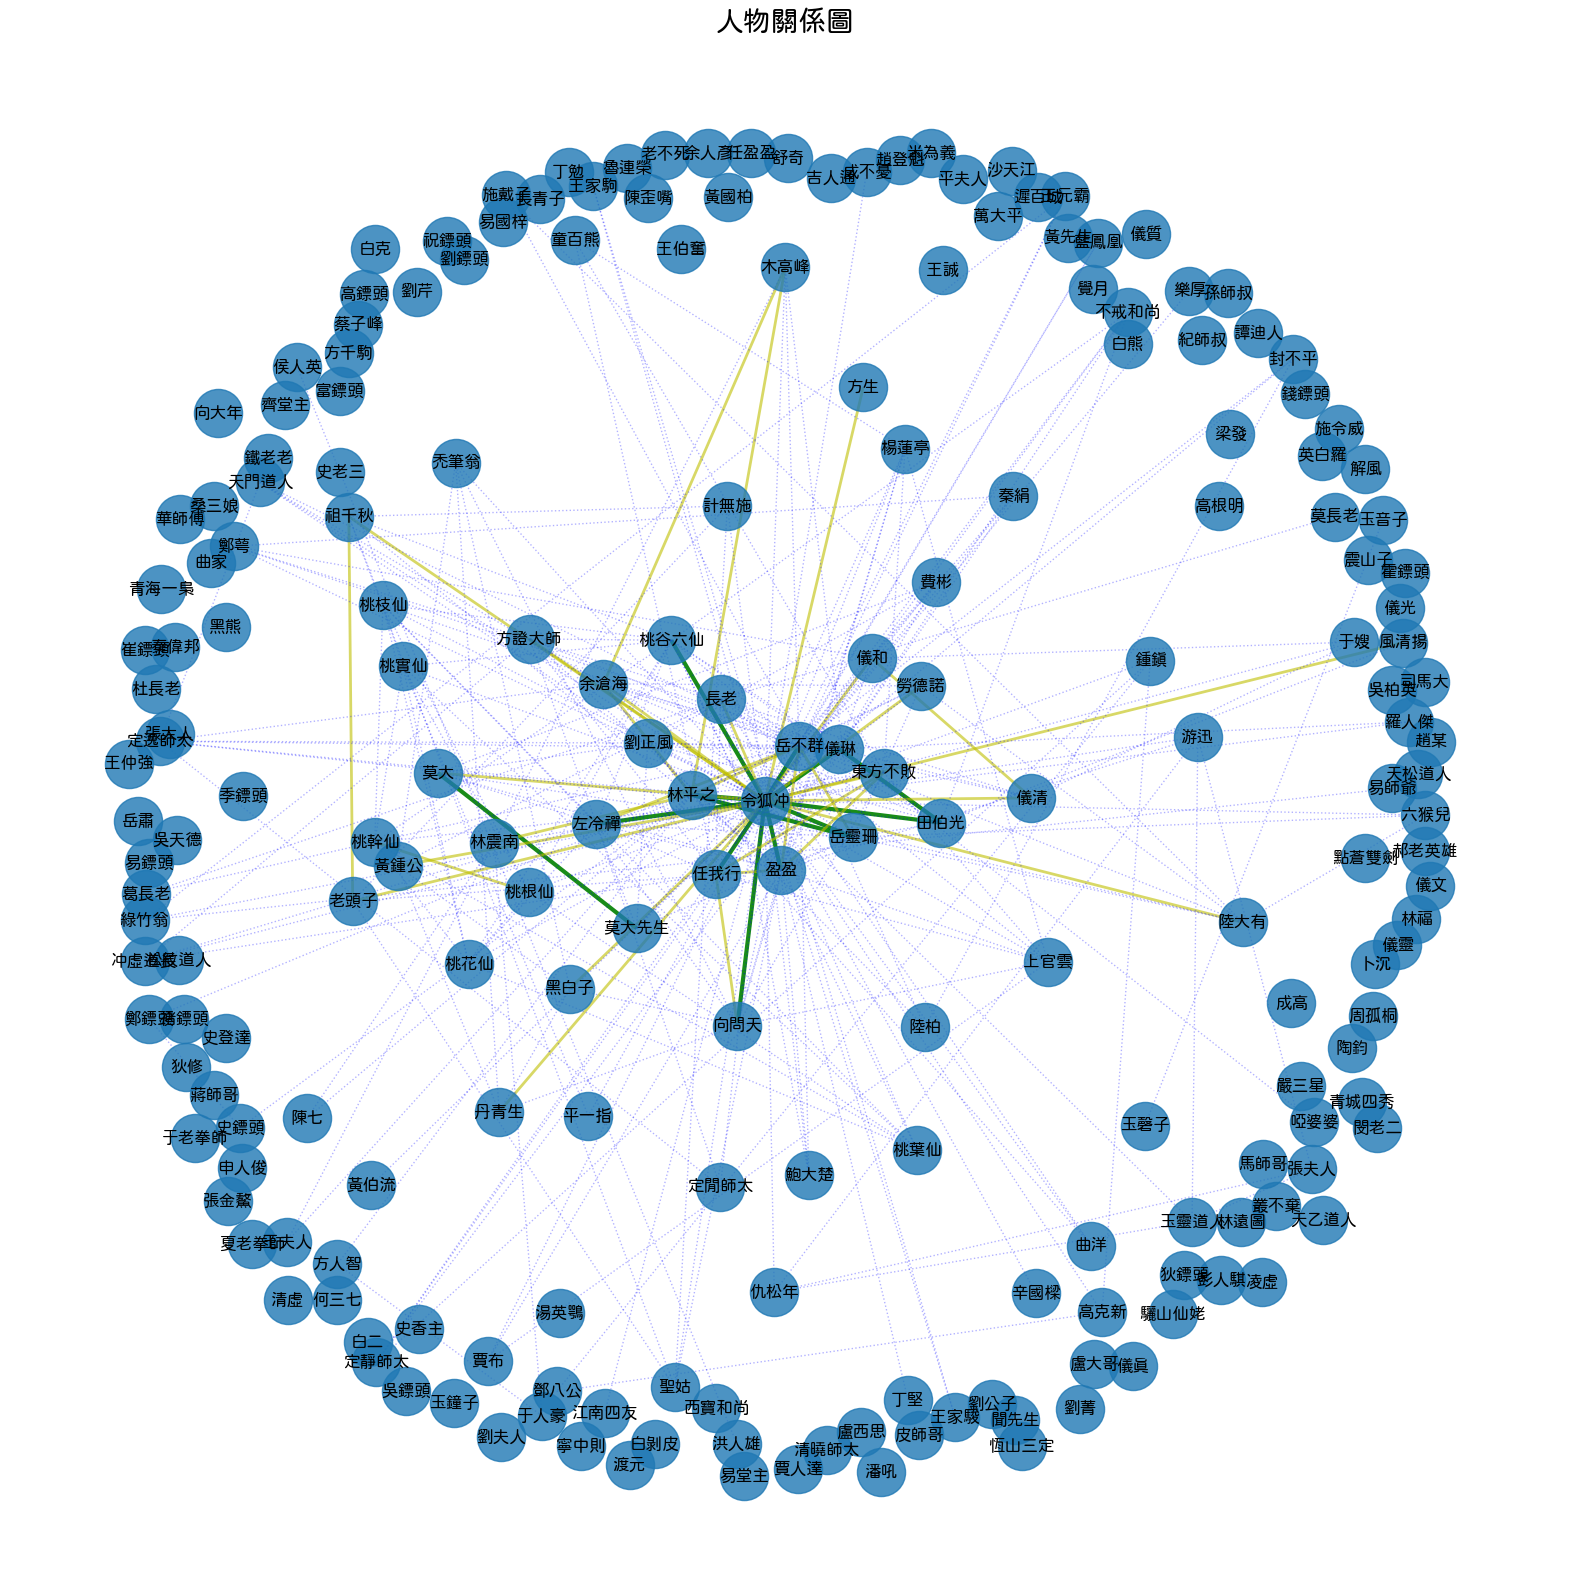

In [12]:
draw_network(char_relation)